*From DataCamp*

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

#data
from google.colab import files
data = files.upload()
boston = pd.read_csv('Boston.csv')
boston.head()

Saving Boston.csv to Boston (4).csv


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<Axes: >

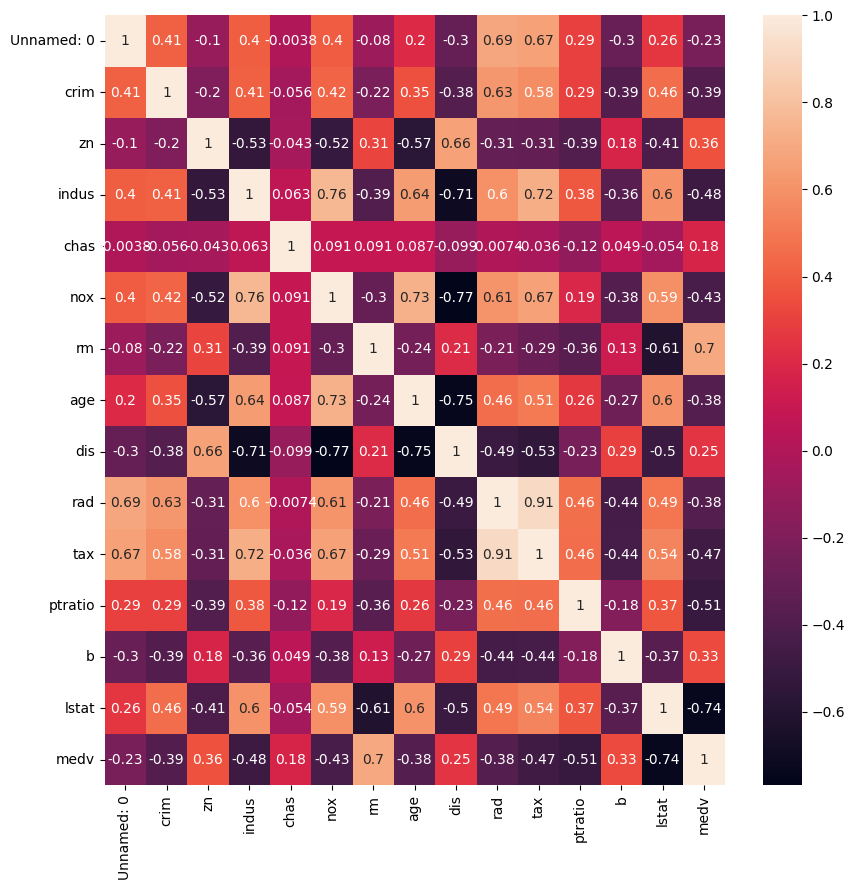

In [33]:
#Exploration
plt.figure(figsize = (10, 10))
sns.heatmap(boston.corr(), annot = True)

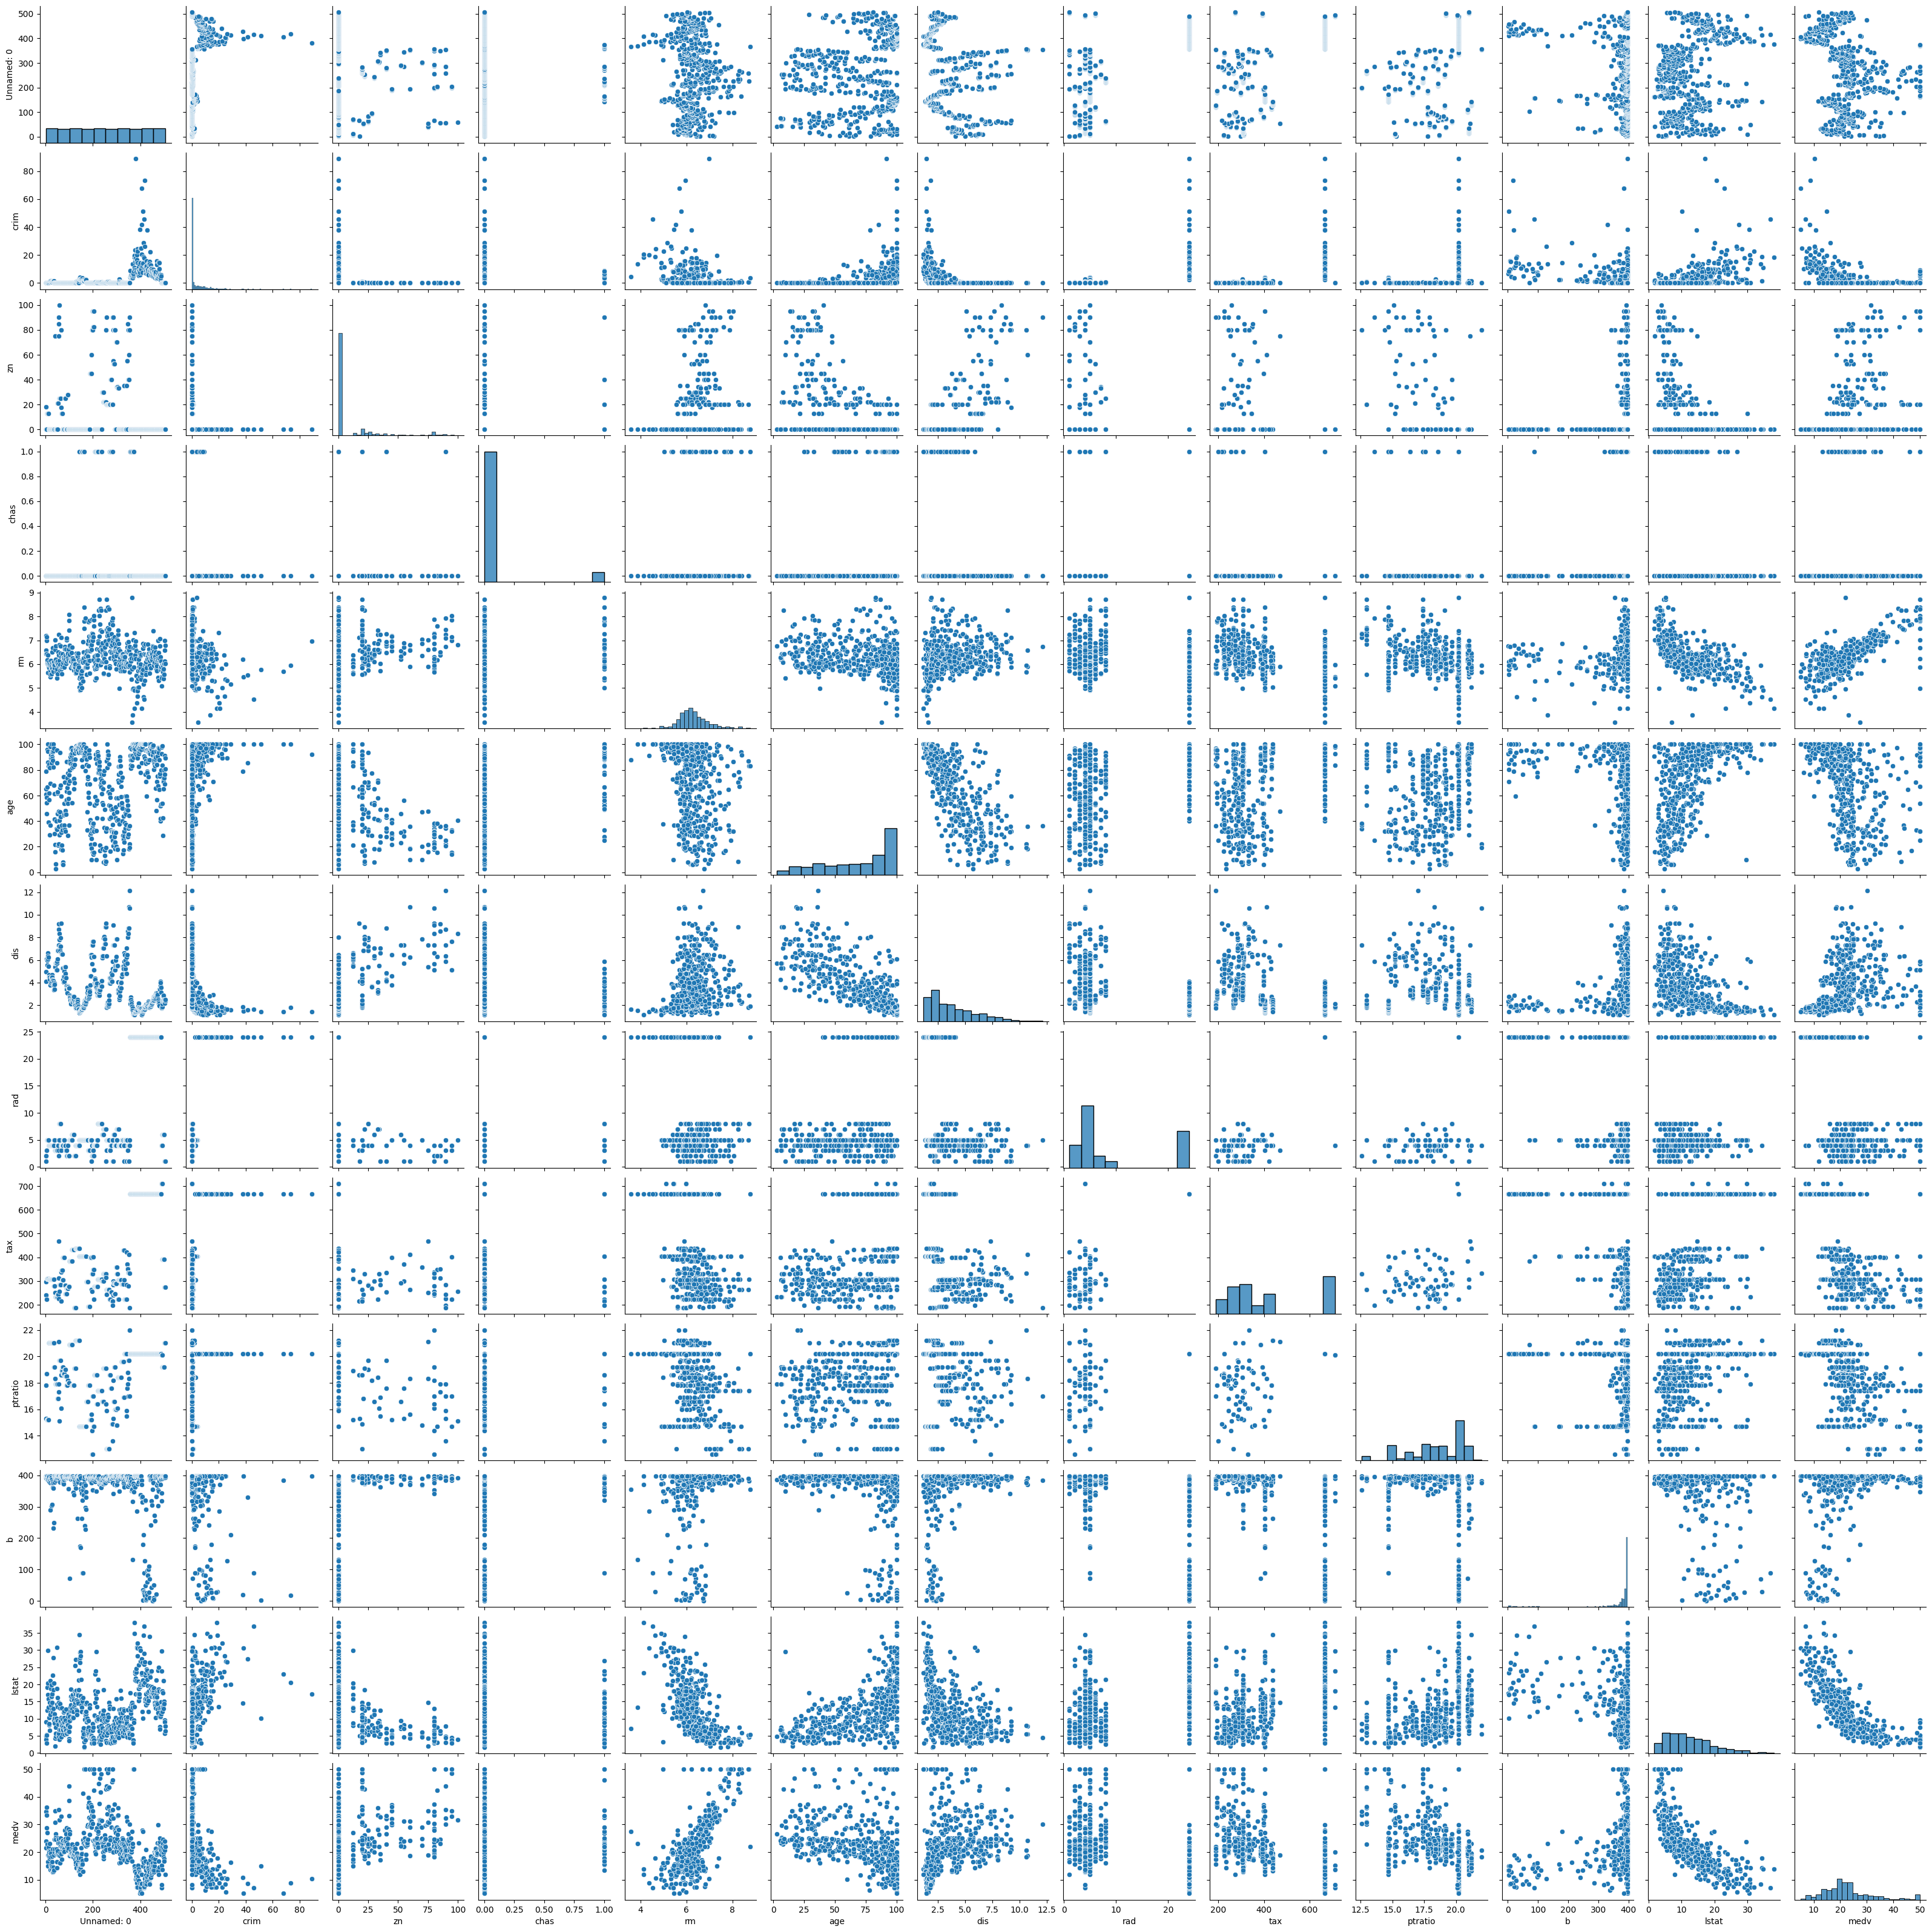

In [35]:
#There are cases of multicolinearity, we will drop a few columns
boston.drop(columns = ["indus", "nox"], inplace = True)

#pairplot
sns.pairplot(boston)

#we will log the LSTAT Column
boston.lstat = np.log(boston.lstat)


Note that we logged the LSTAT column as it doesn't have a linear relationship with the price column. Linear models assume a linear relationship between x and y variables.

## Data Splitting and Scaling



In [39]:
#preview
features = boston.columns[0:11]
target = boston.columns[-1]

#X and y values
X = boston[features].values
y = boston[target].values

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


The dimension of X_train is (354, 11)
The dimension of X_test is (152, 11)


## Linear and Ridge Regression Models

In [40]:
#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
#prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


The train score for lr model is 0.639377183852085
The test score for lr model is 0.7244167923736022

Ridge Model............................................

The train score for ridge model is 0.6381645028526655
The test score for ridge model is 0.7190063942722261


## Lasso Regression

In [42]:
#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))



Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.0030704836212473996


We can visualize the coefficients too.




<Axes: >

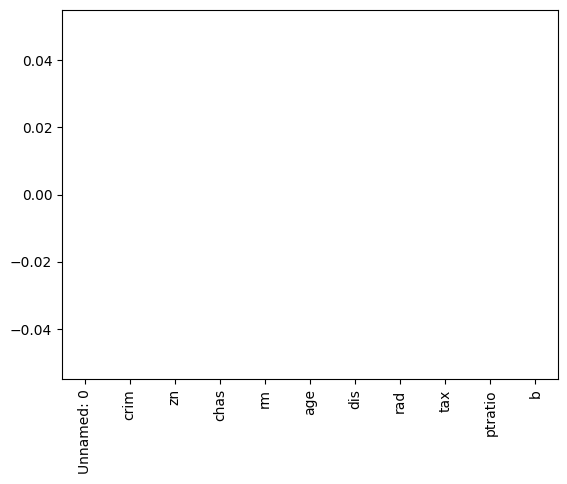

In [43]:
pd.Series(lasso.coef_, features).sort_values(ascending = True).plot(kind = "bar")



## Selecting Optimal Alpha Values Using Cross-Validation in Sklearn


In [44]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)


#score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))


0.6393254648430992
0.7242211813660048
